In [1]:
import os
import librosa #pip install librosa
import IPython.display as ipd #biblioteca para rodar audios
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

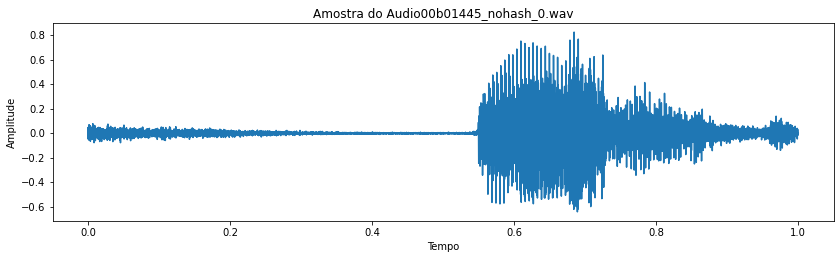

In [2]:
#Primeiro vamos carregar uma amostra de audio para dentro do jupyter notebook
diretorio='C:/Users/Falcone/Documents/0_MachineLearning/2022.08.27_ProcessamentoDaLinguagem/ReconhecimentoDeVoz/Audios/bird/'
amostra, sample_rate = librosa.load(diretorio+'00b01445_nohash_0.wav',sr=16000) #carrega o audio especificado
fig = plt.figure(figsize=(14,8))
ax1=fig.add_subplot(2,1,1)
ax1.set_title('Amostra do Audio' + '00b01445_nohash_0.wav')
ax1.set_xlabel('Tempo')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0,1,sample_rate),amostra)

In [3]:
 len(amostra)

16000

In [4]:
#Criando e visualizando o espectro MFCC
mfcc = librosa.feature.mfcc(y=amostra, hop_length=512,n_mfcc=20) #hop_length é quantas vezes irei subdividir a amostra
#O calculo é (seconds x frames/seconds)/hop_length. Neste caso 1 x 16000/512

In [5]:
#quantidade de frame rates em cada subdivisao
x=1*16000/512
x

31.25

In [6]:
mfcc.shape #20 features no eixo y (20 faixas das principais frequencia), 32 partes de tempo no eixo x (grafico abaixo)

(20, 32)

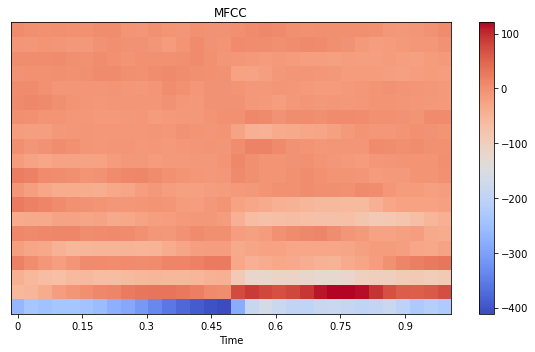

In [7]:
#Mostrando o MFCC
import librosa.display
plt.figure(figsize=(8,5))
librosa.display.specshow(mfcc,x_axis='time', sr=16000)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [8]:
amostra.shape

(16000,)

In [9]:
#Ouvindo uma amostra dentro do jupter notebook
ipd.Audio(amostra,rate=16000)

In [10]:
#Visualizando quantas amostras há em cada classe
diretorio='C:/Users/Falcone/Documents/0_MachineLearning/2022.08.27_ProcessamentoDaLinguagem/ReconhecimentoDeVoz/Audios/'
classes=os.listdir(diretorio)
numero_audios=[]
for classe in classes: #para cada classe bird, cat, dog
    lista_nomes=[nome for nome in os.listdir(diretorio+classe) if nome.endswith('.wav')]
    numero_audios.append(len(lista_nomes)) #salva o tamanho de cada pasta
print('Classe bird:', numero_audios[0],'\nClasse cat:', numero_audios[1],'\nClasse dog:',numero_audios[2])

Classe bird: 1731 
Classe cat: 1733 
Classe dog: 1746


In [11]:
numero_audios

[1731, 1733, 1746]

(array([  11.,    8.,   12.,   17.,   66.,   49.,  107.,   89.,  150.,
        4701.]),
 array([0.4644375 , 0.51799375, 0.57155   , 0.62510625, 0.6786625 ,
        0.73221875, 0.785775  , 0.83933125, 0.8928875 , 0.94644375,
        1.        ]),
 <BarContainer object of 10 artists>)

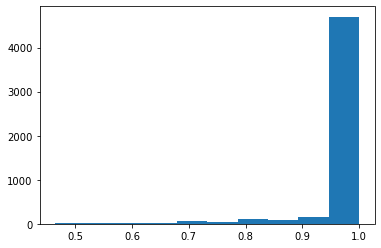

In [12]:
#Mostrando um histograma da duração de cada arquivo
classes=['bird','cat','dog']
duracao_gravacoes=[]
for classe in classes:
    lista_nomes=[nome for nome in os.listdir(diretorio+classe) if nome.endswith('.wav')]
    for nome in lista_nomes: #para cada arquivo
        amostra, sample_rate= librosa.load(diretorio+'/'+classe+'/'+nome, sr=16000)
        duracao_gravacoes.append(float(len(amostra)/sample_rate)) #calcula a duraçao de cada arquivo
plt.hist(np.array(duracao_gravacoes))

In [13]:
#Carregando todos os arquivos por meio da biblioteca librosa e fixando o sample_rate em 8.000 para poupar processamento
#Excluiremos as amostras que tiverem duraçao inferior a 1 segundo
todos_audios=[]
todos_rotulos=[]
cont=0
for classe in classes:
    print('Processando', classe)
    lista_nomes=[nome for nome in os.listdir(diretorio+classe) if nome.endswith('.wav')]
    for nome in lista_nomes:
        cont+=1
        amostra, sample_rate= librosa.load(diretorio+'/'+classe+'/'+nome, sr=16000)
        amostra=librosa.resample(amostra,sample_rate,8000)
        if (len(amostra)==8000):
            todos_audios.append(amostra)
            todos_rotulos.append(classe)

Processando bird
Processando cat
Processando dog


In [14]:
#Mostrando a quantidade total de amostras depois da eliminaçao das amostras com menos de 1 segundo
print('Ficamos com ',len(todos_audios), 'de um total de', cont)

Ficamos com  4583 de um total de 5210


In [15]:
# Obs: com esses dados, poderíamos criar um classificador usando redes neurais densas, por exemplo. Mas como iremos usar 
#LSTM, 8.000 timesteps é um número muito grande, então trabalhar com MFCC será útil.

In [16]:
#Criando os espectrogramas MFCC
mfccs=[]
for audio in todos_audios:
    mfcc=librosa.feature.mfcc(y=audio, sr=8000,n_mfcc=20)
    mfcc=np.transpose(mfcc)
    mfccs.append(mfcc)

In [17]:
#mfccs é uma lista de arrays de 2 dimensoes. Precisamos transformar isso em um array numpy de 3 dimensoes.
mfccs

[array([[-2.50903748e+02, -5.34034500e+01, -4.14283905e+01,
          7.03543615e+00, -2.01110115e+01, -2.65812373e+00,
         -1.72018318e+01,  1.53003197e+01, -7.42565012e+00,
          1.31175575e+01, -2.59891777e+01, -6.09341681e-01,
         -1.32417965e+01,  1.28077087e+01, -6.69485271e-01,
          8.39518356e+00, -7.79989576e+00,  7.35917473e+00,
         -7.10361195e+00,  7.26941013e+00],
        [-2.14633423e+02, -3.80187225e+01, -5.78191261e+01,
         -1.46739941e+01, -2.95230827e+01,  3.89232802e+00,
         -2.11888046e+01,  2.34825110e+00, -2.57518234e+01,
          4.11263084e+00, -2.80115891e+01,  3.47156763e+00,
         -1.62177258e+01,  6.13003254e+00, -6.93597889e+00,
          7.41302299e+00, -7.30576420e+00,  8.75396538e+00,
         -1.16774988e+01,  1.18568683e+00],
        [-2.10139328e+02, -2.36907730e+01, -5.05334702e+01,
         -2.45288849e+01, -3.78877411e+01,  6.89500618e+00,
         -3.16709137e+01, -5.16580963e+00, -3.43533478e+01,
         -4.

In [18]:
mfccs2=np.array(mfccs) #este maneira de fazer a conversao para 3 dimensoes é mais facil do que o Natanael fez

In [19]:
mfccs2.shape

(4583, 16, 20)

In [20]:
#quantidade de frame rates em cada subdivisao
x=8000/512 #512 divisoes é o padrao da biblioteca librosa
x

15.625

In [21]:
x=mfccs2

In [22]:
#Agora iremos trabalhar com as classes. Já criamos uma classe para cada amostra, vamos conferir
len(todos_rotulos)

4583

In [23]:
todos_rotulos

['bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 'bird',
 

In [24]:
#Fazendo label encoding com essas classes
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(todos_rotulos)
classes=list(le.classes_)

In [25]:
#Aplicando one hot encoding
from keras.utils import np_utils
y=np_utils.to_categorical(y,num_classes=len(classes))

In [26]:
y.shape

(4583, 3)

In [27]:
#Agora que já temos nossos dados x e y como arrays numpy nas dimensoes corretamos, podemos separar os dados entre treino e teste
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste=train_test_split(x,y,stratify=y,test_size=0.2) # stratify mantém a proporção das classes

In [28]:
x_treino.shape

(3666, 16, 20)

In [29]:
x_teste.shape

(917, 16, 20)

In [30]:
#Criando a LSTM
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
import warnings
warnings.filterwarnings('ignore')

In [31]:
#Criando o modelo LSTM
modelo=Sequential()
modelo.add(LSTM(150, dropout=0.3, input_shape=(x_treino.shape[1], x_treino.shape[2])))
modelo.add(Dense(3,activation='softmax'))
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
modelo.fit(x_treino, y_treino, epochs=20, batch_size=500, validation_data=(x_teste, y_teste), verbose=2)

Epoch 1/20
8/8 - 3s - loss: 1.1463 - accuracy: 0.3620 - val_loss: 1.0345 - val_accuracy: 0.4973 - 3s/epoch - 346ms/step
Epoch 2/20
8/8 - 1s - loss: 1.0264 - accuracy: 0.4820 - val_loss: 0.9539 - val_accuracy: 0.6031 - 597ms/epoch - 75ms/step
Epoch 3/20
8/8 - 1s - loss: 0.9600 - accuracy: 0.5600 - val_loss: 0.8705 - val_accuracy: 0.7034 - 603ms/epoch - 75ms/step
Epoch 4/20
8/8 - 1s - loss: 0.8794 - accuracy: 0.6315 - val_loss: 0.8028 - val_accuracy: 0.7361 - 600ms/epoch - 75ms/step
Epoch 5/20
8/8 - 1s - loss: 0.7917 - accuracy: 0.6983 - val_loss: 0.7241 - val_accuracy: 0.7405 - 601ms/epoch - 75ms/step
Epoch 6/20
8/8 - 1s - loss: 0.6971 - accuracy: 0.7529 - val_loss: 0.6426 - val_accuracy: 0.7928 - 583ms/epoch - 73ms/step
Epoch 7/20
8/8 - 1s - loss: 0.6195 - accuracy: 0.7897 - val_loss: 0.5636 - val_accuracy: 0.8244 - 600ms/epoch - 75ms/step
Epoch 8/20
8/8 - 1s - loss: 0.5453 - accuracy: 0.8145 - val_loss: 0.4748 - val_accuracy: 0.8604 - 583ms/epoch - 73ms/step
Epoch 9/20
8/8 - 1s - loss

In [33]:
# Fazendo previsões:
from numpy import expand_dims
amostra = expand_dims(x_teste[0], 0) # criando uma dimensão extra para ficar (n_amostras, timesteps, features), pois ao pegar somente x_teste[0] a primeira dimensão morre
prob=modelo.predict(amostra) # obtendo as probabilidades de cada classe
index=np.argmax(prob[0]) # obtendo o índice da coluna com maior probabilidade
classes[index] # mostrando qual a respectiva classe

1/1 [==============================] - 0s 387ms/step


'bird'

In [34]:
# Verificando a resposta
index=np.argmax(y_teste[0])
classes[index]

'bird'